# Lineární regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody GD.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

In [58]:
import numpy as np
import usu
import matplotlib.pyplot as plt


In [59]:
def show_loss(iterations, loss):
    plt.plot(iterations, loss)
    plt.xlabel("Iterace")
    plt.ylabel("Loss")
    plt.title("Průběh trénování")
    plt.show()

## Data


In [60]:
npzfile = np.load('data/data_03.npz')
npzfile.files


['x0', 'x1']

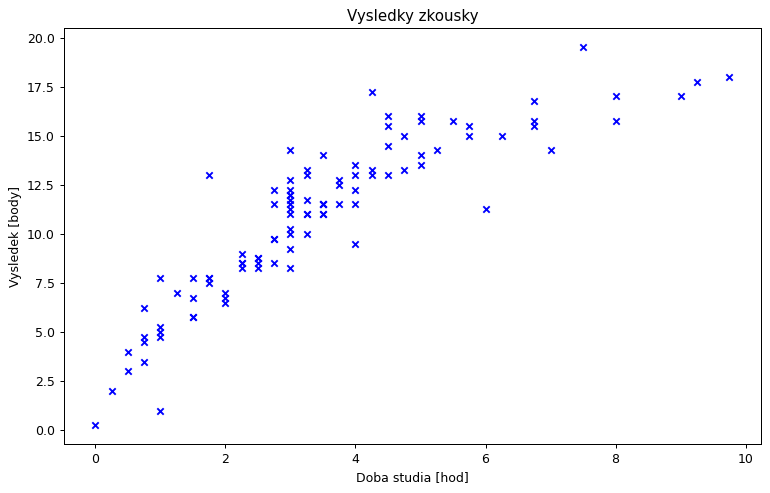

In [61]:
x = npzfile['x0']
y = npzfile['x1']
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


In [62]:
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

## GD (Gradient descent)

### Výpočet $\theta$:

#### Pomocí sumy:

$$ \theta_{i+1} = \theta_{i} - \alpha \sum_{n=0}^{N} \tilde{X_n} (\theta_i^T \tilde{X_n} - y_n) $$

kde $\alpha$ je velikost kroku, $n$ odpovídá jednotlivým řádkům vstupních matic.


**Příklad výpočtu první iterace:**

$$ \tilde{X} = \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3 \\
        \end{bmatrix} ,
     y =  \begin{bmatrix}
     15 \\
     20 \\
     30 \\
    \end{bmatrix},
    \theta_0 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix},
        \alpha = 0.1$$
        
$$ 
\theta_1 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix} - 0.1 \left[  (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} - 15)\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ \end{bmatrix} - 20)\begin{bmatrix} 1 \\ 2 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} - 30)\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix}) \right] = \begin{bmatrix} 6.5 \\ 14.5 \\ \end{bmatrix}
$$

 
#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \theta_{i+1} = \theta_{i} - \alpha \tilde{X^T} (\tilde{X} \theta_i - y) $$


**Poznámka:** Rovnice jsou stejné pro ruzné řády polynomů.


### Výpočet $\theta$ se zahrnutím regularizace:

$$ \theta_{i+1} = \theta_{i}(1-\alpha \lambda) - \alpha  \tilde{X^T} (\tilde{X} \theta_i - y) $$


In [63]:
def computeThetaGD(x, y, alpha=0.1, nIter=100, order=1, lmbd=0, plot_loss=False):
    """
    x - vektor vstupnich hodnot, doba studia
    y - vektor vystupnich  hodnot, zisk bodu
    alpha - krok
    nIter - pocet iteraci
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    plot_loss - zobraz graf zavislosti lossu na iteraci
    """

    # pro kazdou iteraci vypoctete loss a zapiste ho na odpovidajici index v promenne
    loss = np.zeros(nIter)

    #################################################################
    # ZDE DOPLNIT)
    theta = np.zeros((order + 1, 1))
    X = np.ones((x.shape[0]))
    for j in range(1, order + 1):
        X = np.c_[X, x**j]
    for i in range(nIter):
        theta = theta * (1-alpha*lmbd) - alpha * X.T @ (X @ theta - y)
        loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta
    #################################################################
    
    if plot_loss:
        show_loss(np.arange(nIter), loss)

    return theta


Kontrola výpočtu na malém množství dat:

C:\Users\misap\AppData\Local\Temp\ipykernel_18188\1892118920.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta


[[ 6.5]
 [14.5]]


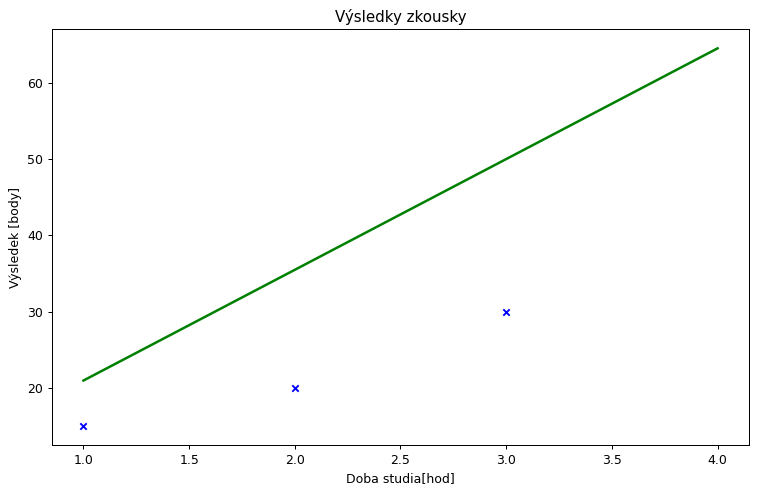

In [64]:
a = np.array([1, 2, 3], ndmin=2).T
b = np.array([15, 20, 30], ndmin=2).T
theta = computeThetaGD(a, b, nIter=1)
print(theta)
usu.draw(a, b, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta)


Určete zisk bodů v případě přípravy v délce 6 hodin. Všimněte si, jak silně $\alpha$ ovlivňuje výsledky:

C:\Users\misap\AppData\Local\Temp\ipykernel_18188\1892118920.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta


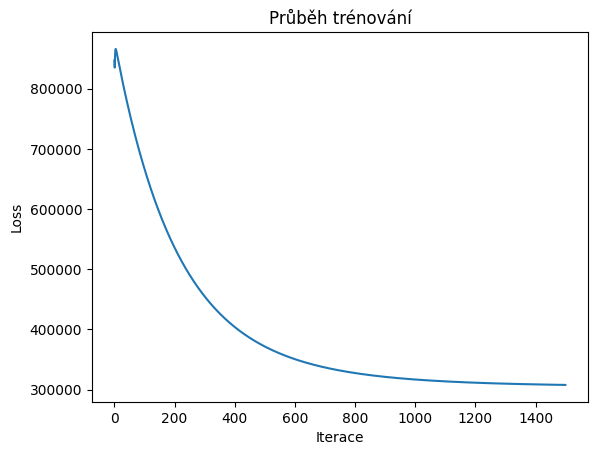

(100, 1) (100, 1)
(3, 1)
x : 6.000, y : 15.780


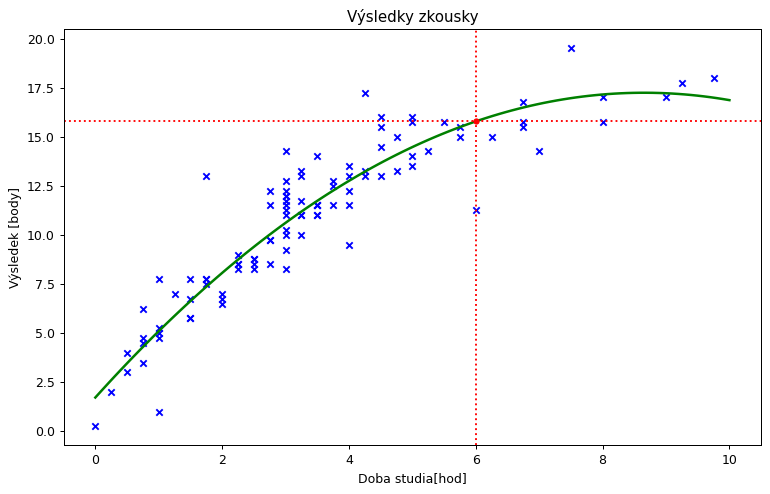

In [65]:
alpha = 0.00001
iterations = 1500
theta = computeThetaGD(x, y, alpha, iterations, plot_loss=True, order=2, lmbd=0.01)

#################################################################
# ZDE DOPLNIT
#valueY a valueX musi byt typu float
print(x.shape, y.shape)
print(theta.shape)

valueX = 6
valueY = np.sum([theta[i] * (valueX ** i) for i in range(theta.shape[0])])

# Nejvhodnejsi rad polynomu a proc: 2, nejmenší loss

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete dobu studia v případě zisku 10 bodů:


x : 3.025, y : 10.000


C:\Users\misap\AppData\Local\Temp\ipykernel_18188\1892118920.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta


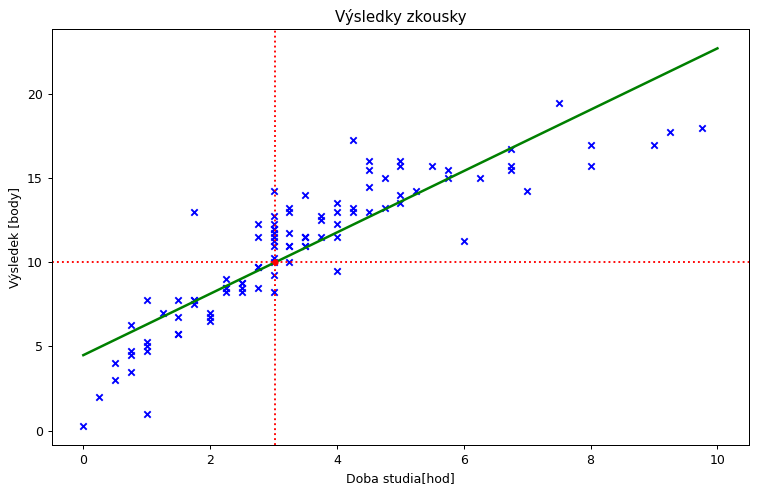

In [66]:
alpha = 0.001
iterations = 100

theta = computeThetaGD(x, y, alpha, iterations)
#print(theta)

#################################################################
# ZDE DOPLNIT
#valueY a valueX musi byt cisla!

valueY = 10
valueX = (valueY - theta[0])/theta[1]

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2, $\lambda$ = 1, $\alpha$ = 
0.00001 a počtu iterací 15000:

C:\Users\misap\AppData\Local\Temp\ipykernel_18188\1892118920.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta


x : 4.000, y : 12.845


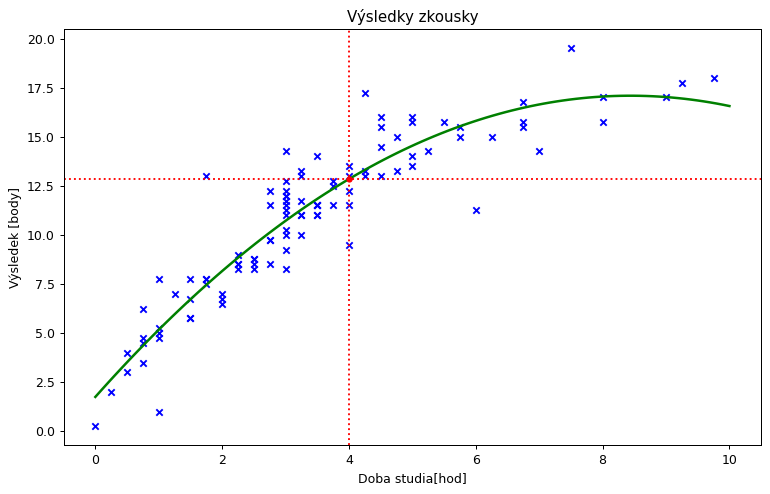

In [67]:
order = 2
lmbd = 1
alpha = 0.00001
iterations = 15000

theta = computeThetaGD(x, y, alpha, iterations, order, lmbd)
#print(theta)

#################################################################
# ZDE DOPLNIT
#valueY a valueX musi byt cisla!

valueX = 4
valueY = np.sum([theta[i] * (valueX ** i) for i in range(theta.shape[0])])

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


### Závěr:
rozhodněte, kdy je vhodnější použít pro nalezení parametrů $\theta$ metodu LSE a kdy GD:  
LSE - přesnější, naleze absolutní minimum, nelze ale použít pro komplikovanější úlohy  
GD - univerzální, lze použít na  komplexnější funkce  


## ADAM (bonus)

Odkaz na  článek: https://arxiv.org/pdf/1412.6980

In [ ]:
def computeThetaADAM(x, y, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, nIter=100, order=1, lmbd=0, plot_loss=False):
    """
    x - vektor vstupnich hodnot, doba studia
    y - vektor vystupnich  hodnot, zisk bodu
    alpha - krok
    beta1 - mira utlumu odhadu prvniho momentu
    beta2 - mira utlumu odhadu druheho momentu
    epsilon - mala konstanta pro numerickou stabilitu
    nIter - pocet iteraci
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    plot_loss - zobraz graf zavislosti lossu na iteraci
    """

    # pro kazdou iteraci vypoctete loss a zapiste ho na odpovidajici index v promenne
    loss = np.zeros(nIter)

    #################################################################
    # ZDE DOPLNIT
    
    theta = np.zeros((order + 1, 1))
    X = np.ones((x.shape[0]))
    m = np.zeros((order + 1, 1))
    v = np.zeros((order + 1, 1))
    for j in range(1, order + 1):
        X = np.c_[X, x**j]
    for i in range(nIter):
        g = alpha * X.T @ (X @ theta - y)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m2 = m / (1-beta1**(i+1))
        v2 = v / (1-beta2**(i+1))
        theta = theta - alpha * m2 / (np.sqrt(v2) + epsilon)
        loss[i] = np.sum((y - theta.T @ X.T)**2) + lmbd * theta.T @ theta
        # print(X, g, m, v, m2, v2, theta, sep="\n")
        # print("aaaa", i, "\n")
    
    #################################################################

    if plot_loss:
        show_loss(np.arange(nIter), loss)

    return theta


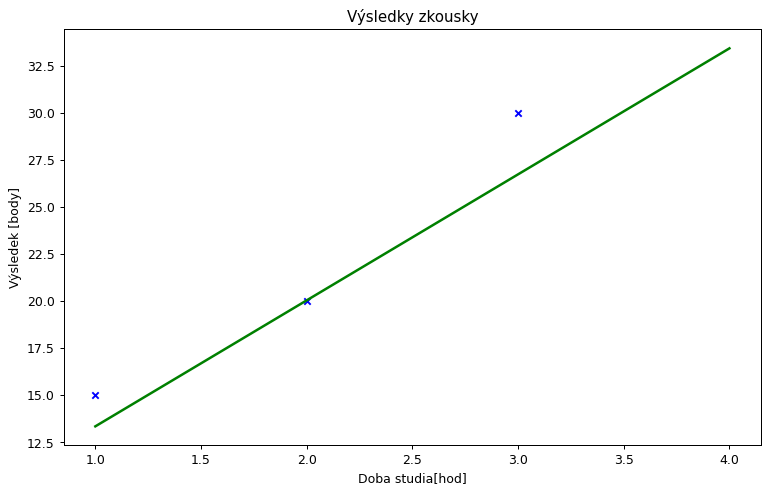

[[6.66729171]
 [6.68945605]]


In [69]:
a = np.array([1, 2, 3], ndmin=2).T
b = np.array([15, 20, 30], ndmin=2).T
theta = computeThetaADAM(a, b, nIter=100)
usu.draw(a, b, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta)
print(theta)


Určete zisk bodů v případě přípravy v délce 6 hodin. Všimněte si, jak silně $\alpha$ ovlivňuje výsledky.

Výhody metody ADAM se typicky projevují až na složitějších datasetech.

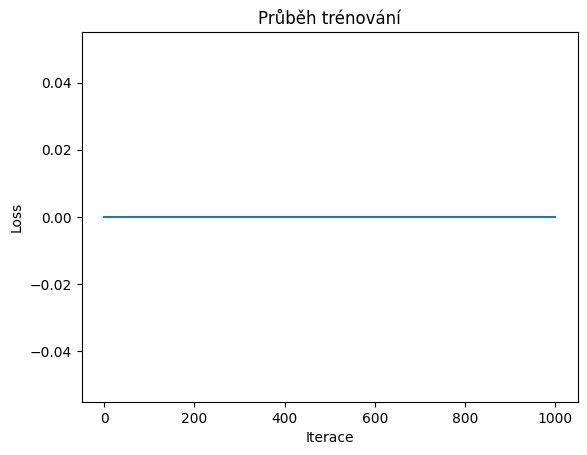

x : 6.000, y : 15.394


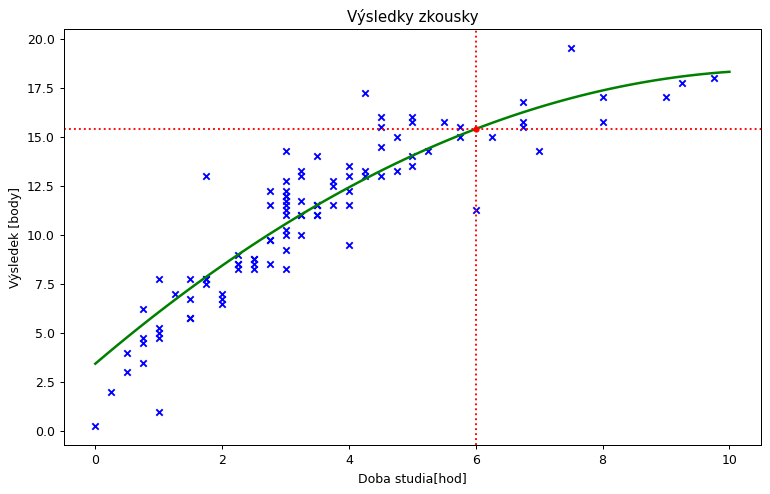

In [70]:
alpha = 0.01
iterations = 1000
order = 2
lmbd = 1
theta = computeThetaADAM(x, y, alpha=alpha, nIter=iterations, order=order, lmbd=lmbd, plot_loss=True)

#################################################################
# ZDE DOPLNIT
#valueY a valueX musi byt typu float

valueX = 6
valueY = np.sum([theta[i] * (valueX ** i) for i in range(theta.shape[0])])

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)
